## Assignment: Weeks 11&12 Exercise


In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

### Histogram

In [2]:
#Read in data
education = pd.read_csv("education.csv")
education.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6


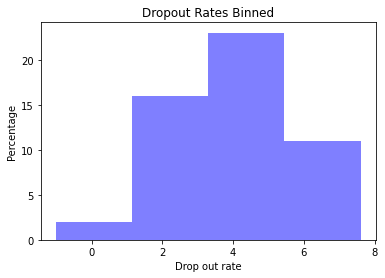

In [4]:
x = education.dropout_rate
num_bins = 4
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Drop out rate')
plt.ylabel('Percentage')
plt.title("Dropout Rates Binned")
plt.show()

### Box plot

In [5]:
#Read in data
dodgers = pd.read_csv("dodgers.csv")
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0


Text(0, 0.5, 'Attendance')

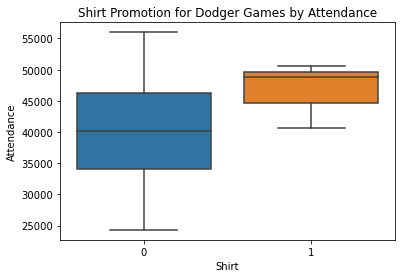

In [6]:
#Create boxplot using Seaborn
sns.boxplot(y = 'attend', x = 'shirt', data = dodgers)
plt.title("Shirt Promotion for Dodger Games by Attendance")
plt.xlabel('Shirt')
plt.ylabel('Attendance')
#0 is Not offered, 1 is yes offered

### Bullet chart

In [7]:
#Read in data
perform = pd.read_csv("StudentsPerformance.csv")
perform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
perform.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#Setting the limits and using the math score average as my example
limits = [30, 50, 70, 90, 100]
data_to_plot = ("Average math score", 69, 100)

#Using seaborn for the palette in shades of blue
palette = sns.color_palette("Blues_r", len(limits))

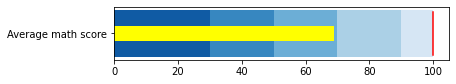

In [14]:
#Creating the bullet chart
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
    prev_limit = lim
    
#Add the black bar that shows the average
ax.barh([1], data_to_plot[1], color='yellow', height=5)

#Setting the second part of target 100%
ax.axvline(data_to_plot[2], color="red", ymin=0.10, ymax=0.9)

### My choice

In [15]:
#Read in data
crime = pd.read_csv("crimerates-by-state-2005.csv")
crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [16]:
#Remove United States and District of Colombia because they are outliers. Following Visualize This
crime = crime[crime.state != 'District of Columbia']
crime = crime[crime.state != 'United States']

Text(0.5, 1.0, 'Robberies vs Motor Vehicle Thefts')

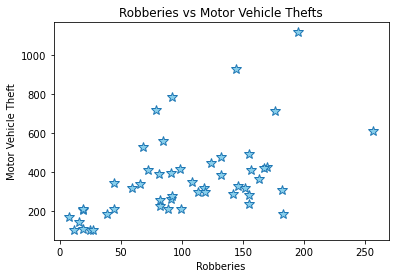

In [17]:
#Creating a scatter plot but using different markers
x = crime.robbery
y = crime.motor_vehicle_theft

plt.plot(x, y, linestyle = 'none', markerfacecolor = 'skyblue', marker = '*', markersize = 10)
plt.xlabel('Robberies')
plt.ylabel('Motor Vehicle Theft')
plt.title('Robberies vs Motor Vehicle Thefts')